# Support Vector Machine (SVM)

## Importing the libraries

In [64]:
import pandas as pd

## Importing the dataset

In [65]:
def load_datasets(file_path):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

X, y = load_datasets('Social_Network_Ads.csv')

## Splitting the dataset into the Training set and Test set

In [66]:
from sklearn.model_selection import train_test_split
def split_data(X, y, test_size=1/4, random_state=0):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

X_train, X_test, y_train, y_test = split_data(X, y)

In [67]:
def print_sets_shape(X_train, X_test, y_train, y_test):
    print("Training set shape:")
    print(X_train.shape)
    print(y_train.shape)
    print("Test set shape:")
    print(X_test.shape)
    print(y_test.shape)


In [68]:
print_sets_shape(X_train, X_test, y_train, y_test)

Training set shape:
(300, 2)
(300,)
Test set shape:
(100, 2)
(100,)


## Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

X_train, X_test, scaler = scale_features(X_train, X_test)

In [70]:
def print_scaled_sets(X_train, X_test):
    queue = [X_train, X_test]
    print('X_train scaled: ')
    while len(queue) > 0:
        current = queue.pop(0)
        for i in range(10):
            print(current[i])
        print('X_test scaled: ')



In [71]:
print_scaled_sets(X_train, X_test)

X_train scaled: 
[ 0.58164944 -0.88670699]
[-0.60673761  1.46173768]
[-0.01254409 -0.5677824 ]
[-0.60673761  1.89663484]
[ 1.37390747 -1.40858358]
[1.47293972 0.99784738]
[ 0.08648817 -0.79972756]
[-0.01254409 -0.24885782]
[-0.21060859 -0.5677824 ]
[-0.21060859 -0.19087153]
X_test scaled: 
[-0.80480212  0.50496393]
[-0.01254409 -0.5677824 ]
[-0.30964085  0.1570462 ]
[-0.80480212  0.27301877]
[-0.30964085 -0.5677824 ]
[-1.10189888 -1.43757673]
[-0.70576986 -1.58254245]
[-0.21060859  2.15757314]
[-1.99318916 -0.04590581]
[ 0.8787462  -0.77073441]
X_test scaled: 


## Training the SVM model on the Training set

In [72]:
from sklearn.svm import SVC
def train_svm(X_train, y_train, kernel='linear', random_state=0):
    svm = SVC(kernel=kernel, random_state=random_state)
    svm.fit(X_train, y_train)
    return svm

classifier = train_svm(X_train, y_train)

## Predicting a new result

In [73]:
classifier.predict(scaler.transform([[30,87000]]))

array([0])

## Predicting the Test set results

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
def print_predictions(y_test, y_pred):
    for i in range(20):
        print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")

print_predictions(y_test, y_pred)

Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0


## Making the Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score

def print_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy}")

print_metrics(y_test, y_pred)

Confusion Matrix:
[[66  2]
 [ 8 24]]
Accuracy: 0.9


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


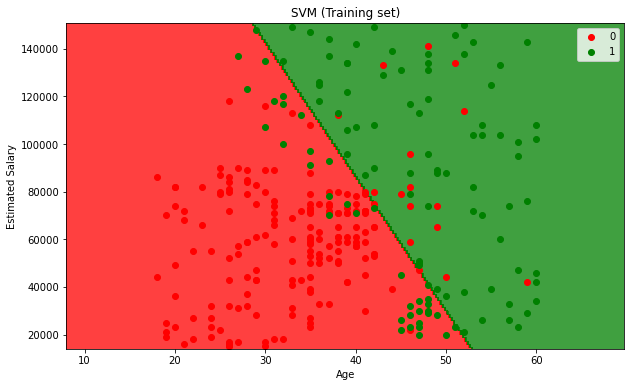

In [77]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


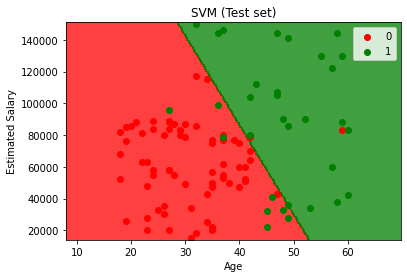

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()